In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [34]:
net=cv2.dnn.readNetFromCaffe("pretrained models/body pose coco model/coco_pose_deploy_linevec.prototxt.txt","pretrained models/body pose coco model/pose_iter_440000.caffemodel")

In [71]:
frame = cv2.imread("dance 2.jpg")
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1
frame.shape

(4509, 3000, 3)

In [72]:
inWidth = 368
inHeight = 368
blob=cv2.dnn.blobFromImage(cv2.resize(frame,(368,368)),1.0/255,(368,368),(0,0,0),swapRB=False,crop=False)

net.setInput(blob)

In [73]:
output=net.forward()

The output is a 4D matrix :

The first dimension being the image ID ( in case you pass more than one image to the network ).
The second dimension indicates the index of a keypoint. The model produces Confidence Maps and Part Affinity maps which are all concatenated. For COCO model it consists of 57 parts – 18 keypoint confidence Maps + 1 background + 19*2 Part Affinity Maps. Similarly, for MPI, it produces 44 points. We will be using only the first few points which correspond to Keypoints.
The third dimension is the height of the output map.
The fourth dimension is the width of the output map.

In [74]:
output.shape

(1, 57, 46, 46)

In [75]:
H = output.shape[2]
W = output.shape[3]


In [76]:
nPoints = 18
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

To break it down: minVal  contains the smallest pixel intensity value, maxVal  contains the largest pixel intensity value, minLoc  specifies the (x, y) coordinates of minVal, and maxLoc  specifies the (x, y) coordinates of maxLoc .

In [77]:
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > .2 : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=5, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

In [78]:
probMap.shape

(46, 46)

In [79]:
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (255,0,0), 20)
        cv2.circle(frame, points[partA], 8, (255, 0, 0), thickness=5, lineType=cv2.FILLED)


cv2.imshow('Output-Keypoints', frameCopy)
cv2.imshow('Output-Skeleton', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

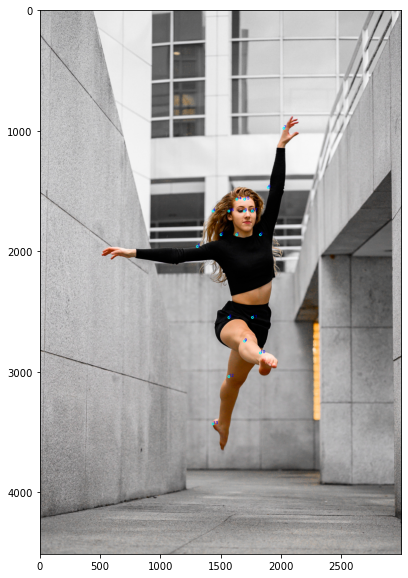

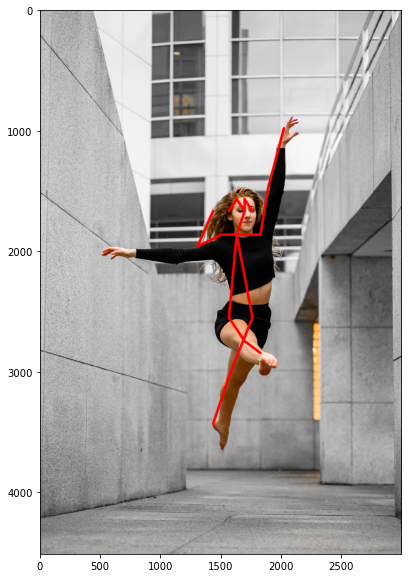

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(frameCopy)
plt.figure(figsize=(10,10))
plt.imshow(frame)

## Live skeleton

In [29]:
def result(frame):
    frameCopy = np.copy(frame)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    inWidth = 368
    inHeight = 368
    blob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)
    net.setInput(blob)
    output=net.forward()
    H = output.shape[2]
    W = output.shape[3]
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]
    points = []

    for i in range(nPoints):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original image
        x = (frameWidth * point[0]) / W
        y = (frameHeight * point[1]) / H

        if prob > .1 : 
            cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
            points.append((int(x), int(y)))
        else :
            points.append(None)
            
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0,255,255), 2)
            cv2.circle(frame, points[partA], 8, ( 0, 0,255), thickness=-1, lineType=cv2.FILLED)


    cv2.imshow('Output-Keypoints', frameCopy)
    cv2.imshow('Output-Skeleton', frame)
   
    return 0



c=cv2.VideoCapture(0)
while True:
    ret,frame=c.read()
    result(frame)
    if cv2.waitKey(1)==13:
        break
c.release()

cv2.destroyAllWindows()

    


In [120]:
cv2.destroyAllWindows()